# Importar libreria requeridas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# NLTK 
import nltk
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#nltk.download()
nltk.download('omw-1.4')
nltk.download('stopwords')

# data visual
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# string proccessing
import re
import string


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pdega\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pdega\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('../2. Analisis Exploratorio de datos+Ingenieria de caracteristicas/comentarios_sin_emojis.csv')
df.head(20
       )

,Text,IsToxic
0,people step case nt people situation lump m...,False
1,Law enforcement trained shoot apprehend trai...,True
2,nt reckon black lives matter banners held whit...,True
3,large number people like police officers calle...,False
4,Arab dude absolutely right shot extra time S...,False
5,people facebook ties isis terrorist groups ...,True
6,Check tube post Black man goes epic rant Fergu...,True
7,LOVE pussy Staten Island spit cop LOVE happen ...,True
8,agree protestor,False
9,mike browns father boooshit,True


# Preprocesado --> Normalización y limpieza

<h5>Se realiza la limpieza y normalización de los comentarios de la columna Text en las siguientes fases:</h5>
<ol>
    <li><b>Eliminación de las stopwords:</b> con la clase stopwords de la libreria nltk: Las palabras vacías o stopwords son palabras en cualquier idioma o corpus que ocurren con frecuencia. Nno aportan ninguna información adicional o valiosa al texto que las contiene. Palabras como a, they, the, is, an, etc. generalmente se consideran palabras vacías.</li>
    <li><b>Eliminación de carácteres pocos significativos:</b> Con metodo sub de la clase re(proporciona operaciones de coincidencia de expresiones regulares).El método sub retorna la cadena obtenida reemplazando las ocurrencias no superpuestas del pattern («patrón») pasado en el primer parametro en la string (tercer parametro) por el reemplazo indicado en el segundo parametro.</li>
      <li><b>Lematización:</b> Con metodo lemmatize de la clase WordLemmatizer de la libreria nltk.La lematización es un proceso lingüístico que consiste en, dada una forma flexionada, hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos.</li>
     <li><b>Tokenización:</b> Con metodo wordtokenizer de la libreria nltk.La tokenización consiste en dividir un texto en entidades más pequeñas llamadas tokens.</li>
         <li><b>Normalización:</b> estandarización de las palabras de los comentarios.En este caso se convierten todas las palabras a minúsculas</li>
    
</ol>

### Stopwords

In [3]:
english_stopwords = stopwords.words('english')
english_stopwords.append('nt')
# Resta de conjuntos : stopwords sin los elementos del segungo conjunto set
stopwords = set(english_stopwords) - set(['i', 'he', 'she', 'you', 'me', 'we', 'us',
                                                   'this', 'them', 'that', 'those', 'her', 'his'])

### Lematizacion

In [4]:
wnl = WordNetLemmatizer()

#### Metodo lemmatize() de la clase WordNetLemmatizer de la librería NLTK

Recibe 2 parametros: texto a lemmatizar y pos.
El parámetro pos es la etiqueta de la parte del discurso a lematizar.
Las opciones válidas son `"n"` para sustantivos, `"v"` para verbos, `"a"` para adjetivos, `"r"` para adverbios y `"s"` para adjetivos satélite.

In [5]:
def lematiza_nombres(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token)
        a.append(lemmetized_word)
    return a

def lematiza_verbos(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token, pos='v')
        a.append(lemmetized_word)
    return a

def lematiza_adjetivos(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token,pos='a')
        a.append(lemmetized_word)
    return a

def lematiza_adverbios(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token, pos='r')
        a.append(lemmetized_word)
    return a

def lematiza_adj_satelites(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token,pos='s')
        a.append(lemmetized_word)
    return a

### Normalización --> Eliminación de caracteres poco significativos y convertir a minúsculas los comentarios

In [6]:
def eliminar_caracteres(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', text)
    text = re.sub(r'https|http?:\/\/\S+', '', text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub("(\W)"," ",text)
    text = re.sub('S*dS*s*','', text)
    # ELIMINAR ABREVIATURAS
   
    return text


In [7]:
def minusculas(text):
    text = text.lower()
    return text

In [8]:
# Convierte lista de strings en una cadena de strings
def list_to_strs(text):
    return ' '.join(text)


In [9]:
# Normalizacion y limpieza 
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['Text'] = df['Text'].apply(eliminar_caracteres)
df['Text'] = df['Text'].apply(minusculas)
# Tokenización y lematización
df['Text'] = df['Text'].apply(word_tokenize)
df['Text'] = df['Text'].apply(lematiza_nombres)
df['Text'] = df['Text'].apply(lematiza_verbos)
df['Text'] = df['Text'].apply(lematiza_adjetivos)
df['Text'] = df['Text'].apply(lematiza_adverbios)
df['Text'] = df['Text'].apply(lematiza_adj_satelites)
df['Text'] = df['Text'].apply(list_to_strs)

In [10]:
df['Text']

0      people step case people situation lump mess ma...
1      law enfocement taine shoot appehen taine shoot...
2      eckon black life matte bannes hel white cunt k...
3      lage numbe people like police office calle cim...
4      aab ue absolutely ight shoot exta time shoot a...
                             ...                        
994                          emembe send national efence
995    stats epesent poblem race bait attitue cimes o...
996                       quote mothe wow hit ha accuate
997                                           vieo acist
998                                  go naato annoy lisp
Name: Text, Length: 999, dtype: object

##  Vectorización de palabras

In [11]:
#sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

### Mezcla aleatoria de los registros del dataframe

In [12]:
## Hipotesis: mezclamos el df por sesgos humanos a la hora de insertar registros o comentarios que son
## sugestionados por el sig o ant comentario
df = shuffle(df, random_state = 42)
df

,Text,IsToxic
453,goo job etemining occue bown kille occue simpl...,False
793,awesome job peggy thank tell tuth westanwithpe...,False
209,come ea acist comment lol,False
309,majo iffeence zimmeman case shoote zimmemans w...,False
740,nigga love victim situation sepaate black peop...,True
...,...,...
106,think inecent unessacey event peson shoot m bo...,False
270,guy love guy spen minute telus oll blunt,False
860,people shouldve wish wouldve literally burn en...,True
435,look like m bown suicie cop thing,True


### Vectorizacion: ajuste y escalado/normalizacion de los tokens

#### Se crea un vectorizador utilizando un algoritmo Tfidf. Posteriormente se le pasa al vectorizador los datos con los que deseamos trabajar. Ésto nos creará una matriz dispersa

In [13]:
# Inicializacion de constructores de las 2 técnicas de vectorizacion: CountVectorizer() y TfidfTransformer()
vectorizer = CountVectorizer()
tfid = TfidfTransformer()

In [14]:
#Ajuste y escalado (normalizacion). Finalmente Pasamos a array nuestro vectores a nuestro modelo
vectorizer = vectorizer.fit(df['Text'])
transformer= vectorizer.transform(df['Text'])
transformer=tfid.fit_transform(transformer)

In [15]:
X = vectorizer.fit_transform(df['Text']).toarray()
X = tfid.fit_transform(X).toarray()

#### Convertir variable target booleana en entera con valores binarios (0 o 1)

In [16]:
df['IsToxic'] = df['IsToxic'].replace({True: 1, False: 0})
print(df['IsToxic'])

453    0
793    0
209    0
309    0
740    1
      ..
106    0
270    0
860    1
435    1
102    1
Name: IsToxic, Length: 999, dtype: int64


##### VAriable traget (Columna IsToxic)

In [17]:
y = df['IsToxic']

### Visualización de métricas de evaluación del modelo

In [18]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score,precision_score,accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def show_metrics(predicciones_test, resultado_test,predicciones_train,resultado_train):
    # Metricas de test
   # Score_auc = roc_auc_score(y_true = predicciones_test, y_score = resultado_test)
    f1 = f1_score(y_true = predicciones_test, y_pred = resultado_test)
    precision=precision_score(y_true = predicciones_test, y_pred = resultado_test)
    accuracy= accuracy_score(y_true = predicciones_test, y_pred = resultado_test)
    #print(f'Score_auc:{Score_auc}')
    print(f'f1_score:{f1}')
    print(f'precision:{precision}')
    print(f'accuracy:{accuracy}')
    print()
    # Metricas train
    print("METRICAS TRAIN")
    #Score_auc_train = roc_auc_score(y_true = predicciones_train, y_score = resultado_train)
    f1_train = f1_score(y_true = predicciones_train, y_pred = resultado_train)
    precision_train=precision_score(y_true = predicciones_train, y_pred = resultado_train)
    accuracy_train= accuracy_score(y_true = predicciones_train, y_pred = resultado_train)
    #print(f'Score_auc train:{Score_auc_train}')
    print(f'f1_score train:{f1_train}')
    print(f'precision train:{precision_train}')
    print(f'accuracy train:{accuracy_train}')
    
    # Overfitting
    print()
    print("Overfitting")
    #print(f'Score_auc overfitting: {((Score_auc_train-Score_auc)*100)/Score_auc} %')
    print(f'f1_score overfitting:{((f1_train-f1)*100)/f1} %')
    print(f'precision overfitting:{((precision_train-precision)*100)/precision} %')
    print(f'accuracy overfitting:{((accuracy_train-accuracy)*100)/accuracy} %')
    
    ## MAtriz de confusión
    print(classification_report(predicciones_test,resultado_test))
    matriz_confusion = confusion_matrix(y_true = predicciones_test, y_pred = resultado_test)
    matriz_confusion_df = pd.DataFrame(matriz_confusion)
    label = ['positivo', 'negativo']
       
    matriz_confusion_df.columns= label
    matriz_confusion_df.index = label

    # Y nombramos lo que son las columnas y las filas:
    matriz_confusion_df.columns.name = "Predicho"
    matriz_confusion_df.index.name = "Real"

    plt.figure(figsize=(8,4))
    sns.heatmap(matriz_confusion_df,                     
            annot=True,
            fmt="d",
            cmap="Blues")

### Separación de datos de entrenamiento y validación

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algoritmo catboost (Seleccionado en la etapa anterior)
<b>Se realizan los siguientes pasos:</b>
<ol>
    <li>Creacion del modelo con ajuste de hiperparametros y validacion con datos de test</li>
    <li>Evaluacion del rendimiento del modelo a través de sus metricas</li>
    <li>Tunning o ajuste del modelo mediante optimizacion de hiperparametros con GridSearch y randomSearch combinado con validacion cruzada
    </ol>

## Catboost Baseline model

In [20]:
CBT_model = CatBoostClassifier(iterations=1000, learning_rate=0.001, loss_function='Logloss', eval_metric='AUC', use_best_model=True ) 
CBT_model.fit(X_train,y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5, verbose=False)

In [21]:
y_pred_CBT = CBT_model.predict(X_test)
pred_train_CBT = CBT_model.predict(X_train)
y_pred_train = pred_train_CBT.astype(dtype=bool)

f1_score:0.4285714285714286
precision:0.28125
accuracy:0.64

METRICAS TRAIN
f1_score train:0.4085106382978723
precision train:0.26229508196721313
accuracy train:0.6520650813516896

Overfitting
f1_score overfitting:-4.6808510638298 %
precision overfitting:-6.739526411657554 %
accuracy overfitting:1.8851689612015 %
              precision    recall  f1-score   support

           0       0.97      0.59      0.74       170
           1       0.28      0.90      0.43        30

    accuracy                           0.64       200
   macro avg       0.63      0.75      0.58       200
weighted avg       0.87      0.64      0.69       200



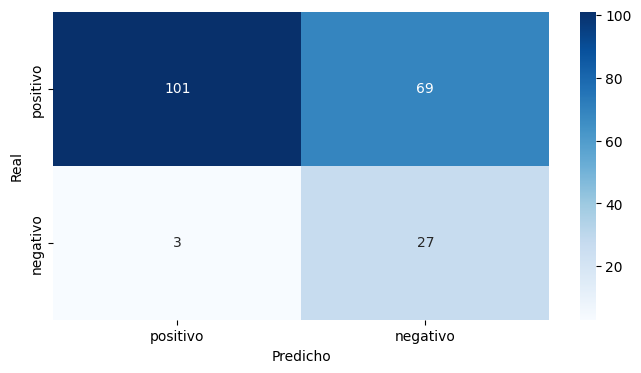

In [22]:
show_metrics(y_pred_CBT, y_test,y_pred_train,y_train)

### Optimización de hiperparámetros con RandomizedSearchCV

In [23]:
from sklearn.model_selection import RandomizedSearchCV

estimator =CatBoostClassifier()
parameters =  {  'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.001,0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100],
              'l2_leaf_reg': [1, 3, 5, 7, 9]
            }

rd_search = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=False
)

eval_set = [(X_train, y_train), (X_test, y_test)]
rd_search.fit(X_train, y_train,
                early_stopping_rounds = 20,
                eval_set = eval_set, verbose = False)

print(" The best estimator across ALL searched params: ", rd_search.best_estimator_)
print(" The best score across ALL searched params: ", rd_search.best_score_)
print(" The best parameters across ALL searched params: ", rd_search.best_params_)
print(" The best scoring across ALL searched params: : ", rd_search.scoring)

# Guardamos el mejor modelo
modelo_CB_hyper = rd_search.best_estimator_

 The best estimator across ALL searched params:  <catboost.core.CatBoostClassifier object at 0x0000025D682ED7B0>
 The best score across ALL searched params:  0.7561269322073334
 The best parameters across ALL searched params:  {'learning_rate': 0.04, 'l2_leaf_reg': 7, 'iterations': 70, 'depth': 10}
 The best scoring across ALL searched params: :  roc_auc


f1_score:0.5931034482758621
precision:0.4479166666666667
accuracy:0.705

METRICAS TRAIN
f1_score train:0.6268115942028986
precision train:0.4726775956284153
accuracy train:0.7421777221526908

Overfitting
f1_score overfitting:5.683350185372418 %
precision overfitting:5.528021349599697 %
accuracy overfitting:5.273435766339133 %
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       151
           1       0.45      0.88      0.59        49

    accuracy                           0.70       200
   macro avg       0.70      0.76      0.68       200
weighted avg       0.82      0.70      0.73       200



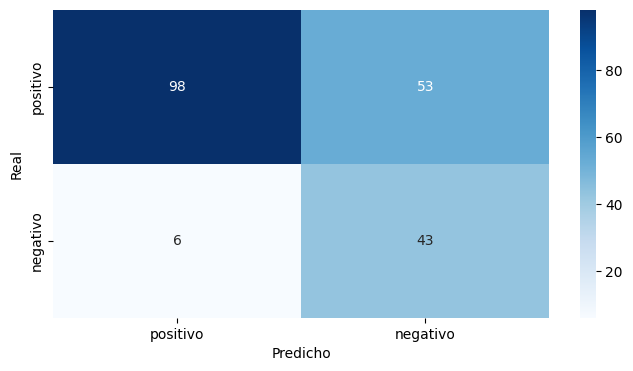

In [24]:
y_pred_CB_rs = modelo_CB_hyper.predict(X_test)
pred_train = modelo_CB_hyper.predict(X_train)
y_pred_train_rs = pred_train.astype(dtype=bool)
show_metrics(y_pred_CB_rs, y_test,y_pred_train_rs,y_train)

### Optimización de hiperparámetros con GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
CBC = CatBoostClassifier()
parameters =  {  'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.001,0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100],
              'l2_leaf_reg': [1, 3, 5, 7, 9]
            }
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1,scoring = 'precision')
Grid_CBC.fit(X_train, y_train,
                early_stopping_rounds = 20,
                eval_set = eval_set, verbose = False)

In [ ]:
modelo_CB_hyperGrid = Grid_CBC.best_estimator_

In [ ]:
y_pred_CBGS =modelo_CB_hyperGrid.predict(X_test)
pred_train =modelo_CB_hyperGrid.predict(X_train)
y_pred_trainGS = pred_train.astype(dtype=bool)
show_metrics(y_pred_CBGS, y_test,y_pred_trainGS,y_train)

# Guardar transformer y mejor modelo

In [40]:
import pickle

In [24]:
### Guardando diccionario BoW para usarlo mas tarde en la predicción
transformer_path = 'transformer.pkl'
pickle.dump(vectorizer , open(transformer_path, "wb"))

In [41]:
pickle.dump(modelo_CB_hyper, open('modelo_entrenado_final.pkl', 'wb'))